In [ ]:
# TODO scrape any car data from ss.com
# clean up prices as numerics
# group by make and model
# plot the data - pricing for sure
# if you do more advanced analysis that also could be used for the final project

# for those who want scraping part of final project
# scrape data from somewhere else - maybe Lithuanian ss.com or wikipedia?

In [1]:
import requests
import time 
import pandas as pd
 
from bs4 import BeautifulSoup

In [2]:
url = "https://www.ss.com/en/transport/cars/ford/"
url

'https://www.ss.com/en/transport/cars/ford/'

In [3]:
req = requests.get(url) 
req.status_code

200

In [4]:
soup = BeautifulSoup(req.text, 'lxml') 
soup.title

<title>SS.COM Cars - Ford, Prices - Advertisements</title>

In [5]:
headline = soup.find("tr", {"id":"head_line"}) # this is a shorter way of finding by tr AND this element having particular id
headline

<tr id="head_line">
<td class="msg_column" colspan="3" width="70%">
<span style="float:left;"> Advertisements
</span>
<span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
<noindex>
<a class="a19" href="/en/transport/cars/ford/fDgSeF4S.html" rel="nofollow">date</a></noindex></span>
</td>
<td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/en/transport/cars/ford/fDgSeF4VFjwT.html" rel="nofollow" title="">Model</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/en/transport/cars/ford/fDgSeF4SHTwT.html" rel="nofollow" title="">Year</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/en/transport/cars/ford/fDgSeF4SEDwT.html" rel="nofollow" title="">Volume</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/en/transport/cars/ford/fDgSeF4SEzwT.html" rel="nofollow" title="">Run</a></noindex></td><td class="msg_column_td" nowrap=""><noinde

In [6]:
headtds = headline.find_all("td")
# td stands for table data
# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/td 
headtds

[<td class="msg_column" colspan="3" width="70%">
 <span style="float:left;"> Advertisements
 </span>
 <span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
 <noindex>
 <a class="a19" href="/en/transport/cars/ford/fDgSeF4S.html" rel="nofollow">date</a></noindex></span>
 </td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/en/transport/cars/ford/fDgSeF4VFjwT.html" rel="nofollow" title="">Model</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/en/transport/cars/ford/fDgSeF4SHTwT.html" rel="nofollow" title="">Year</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/en/transport/cars/ford/fDgSeF4SEDwT.html" rel="nofollow" title="">Volume</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/en/transport/cars/ford/fDgSeF4SEzwT.html" rel="nofollow" title="">Run</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noind

In [7]:
headcolumns = [el.text for el in headtds[1:]] #.text gets us content even from children and grandchildren
headcolumns

['Model', 'Year', 'Volume', 'Run', 'Price']

In [8]:
def getColList(soup):
    column_list = ["description","url"] 
    headline = soup.find("tr", {"id":"head_line"})
    headtds = headline.find_all("td")
    headcolumns = [el.text for el in headtds[1:]] 
    column_list += headcolumns
    return column_list

In [9]:
column_names = getColList(soup)
column_names

['description', 'url', 'Model', 'Year', 'Volume', 'Run', 'Price']

In [10]:
def getRowList(soup):
    trows = soup.find_all('tr')
    aprows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
    return aprows

In [11]:
def getRow(row, colist=column_names):
    row_tds = row.find_all('td')
    rowDict = {}
    if len(row_tds) < 3: # a little sanity check
        print("Hmm bad row")
        return rowDict
    
    rowDict[colist[0]] = row_tds[2].text # so the big assumption is that we always get description in 3rd column
    rowDict[colist[1]] = "https://ss.com" + row_tds[1].find('a').get('href')
    for td,key in zip(row_tds[3:],colist[2:]): 
        rowDict[key] = td.text
    return rowDict

In [12]:
def getRows(rowlist,colist=column_names):
    return [getRow(row, colist=colist) for row in rowlist]

In [13]:
def getDFfromURL(url):
    
    req = requests.get(url)
    if req.status_code != 200:
        print("Request Fail with", req.status_code)
        return None 
    soup = BeautifulSoup(req.text, 'lxml')
    column_names = getColList(soup)
    rowlist = getRowList(soup)
    rows = getRows(rowlist,colist=column_names)
    return pd.DataFrame(rows, columns=column_names)

In [14]:
ford_iki = "https://www.ss.com/en/transport/cars/ford/"
my_fords = getDFfromURL(ford_iki)
my_fords.head()

,description,url,Model,Year,Volume,Run,Price
0,"Pārdodu Ford Mondeo, atdzītu no Norvēģijas. Pa...",https://ss.com/msg/en/transport/cars/ford/mond...,Mondeo,2007,2.0D,269 thd.,"2,590 €"
1,Машина в хорошем состоянии. Самая полная компл...,https://ss.com/msg/en/transport/cars/ford/gala...,Galaxy,2007,2.0D,287 thd.,"4,600 €"
2,"Ford Fiesta 1.6 Tdci, 70kW, 03.2013 g. \r\n\r\...",https://ss.com/msg/en/transport/cars/ford/fies...,Fiesta,2013,1.6D,-,"6,650 €"
3,"Ford Mondeo 2.0L Dīzelis, 103kW, 12.2009 g. \r...",https://ss.com/msg/en/transport/cars/ford/mond...,Mondeo,2009,2.0D,-,"4,700 €"
4,"Ford Focus 1.6 Tdci Titanium, 77kW, 06.2014 g....",https://ss.com/msg/en/transport/cars/ford/focu...,Focus,2014,1.6D,-,"7,500 €"


In [15]:
my_fords.drop("url", inplace=True, axis=1)
my_fords.head()

,description,Model,Year,Volume,Run,Price
0,"Pārdodu Ford Mondeo, atdzītu no Norvēģijas. Pa...",Mondeo,2007,2.0D,269 thd.,"2,590 €"
1,Машина в хорошем состоянии. Самая полная компл...,Galaxy,2007,2.0D,287 thd.,"4,600 €"
2,"Ford Fiesta 1.6 Tdci, 70kW, 03.2013 g. \r\n\r\...",Fiesta,2013,1.6D,-,"6,650 €"
3,"Ford Mondeo 2.0L Dīzelis, 103kW, 12.2009 g. \r...",Mondeo,2009,2.0D,-,"4,700 €"
4,"Ford Focus 1.6 Tdci Titanium, 77kW, 06.2014 g....",Focus,2014,1.6D,-,"7,500 €"


In [16]:
my_fords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  30 non-null     object
 1   Model        30 non-null     object
 2   Year         30 non-null     object
 3   Volume       30 non-null     object
 4   Run          30 non-null     object
 5   Price        30 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [17]:
my_fords["price_n"] = my_fords.Price.str.split(' ').str[0]
my_fords.head()

,description,Model,Year,Volume,Run,Price,price_n
0,"Pārdodu Ford Mondeo, atdzītu no Norvēģijas. Pa...",Mondeo,2007,2.0D,269 thd.,"2,590 €","2,590"
1,Машина в хорошем состоянии. Самая полная компл...,Galaxy,2007,2.0D,287 thd.,"4,600 €","4,600"
2,"Ford Fiesta 1.6 Tdci, 70kW, 03.2013 g. \r\n\r\...",Fiesta,2013,1.6D,-,"6,650 €","6,650"
3,"Ford Mondeo 2.0L Dīzelis, 103kW, 12.2009 g. \r...",Mondeo,2009,2.0D,-,"4,700 €","4,700"
4,"Ford Focus 1.6 Tdci Titanium, 77kW, 06.2014 g....",Focus,2014,1.6D,-,"7,500 €","7,500"


In [18]:
my_fords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  30 non-null     object
 1   Model        30 non-null     object
 2   Year         30 non-null     object
 3   Volume       30 non-null     object
 4   Run          30 non-null     object
 5   Price        30 non-null     object
 6   price_n      30 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB


In [19]:
my_fords.price_n = my_fords.price_n.str.replace(",","").astype('int32') 
my_fords.head()

# df.price = df.price.str.replace(",","").astype('int32') # so clean string of , and then convert to integer
# df.head()

,description,Model,Year,Volume,Run,Price,price_n
0,"Pārdodu Ford Mondeo, atdzītu no Norvēģijas. Pa...",Mondeo,2007,2.0D,269 thd.,"2,590 €",2590
1,Машина в хорошем состоянии. Самая полная компл...,Galaxy,2007,2.0D,287 thd.,"4,600 €",4600
2,"Ford Fiesta 1.6 Tdci, 70kW, 03.2013 g. \r\n\r\...",Fiesta,2013,1.6D,-,"6,650 €",6650
3,"Ford Mondeo 2.0L Dīzelis, 103kW, 12.2009 g. \r...",Mondeo,2009,2.0D,-,"4,700 €",4700
4,"Ford Focus 1.6 Tdci Titanium, 77kW, 06.2014 g....",Focus,2014,1.6D,-,"7,500 €",7500


In [20]:
my_fords.Run = my_fords.Run.str.replace(" thd.","000")
my_fords.head(15)

C:\Users\zirav\AppData\Local\Temp\ipykernel_3296\1796039834.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  my_fords.Run = my_fords.Run.str.replace(" thd.","000")


,description,Model,Year,Volume,Run,Price,price_n
0,"Pārdodu Ford Mondeo, atdzītu no Norvēģijas. Pa...",Mondeo,2007,2.0D,269000,"2,590 €",2590
1,Машина в хорошем состоянии. Самая полная компл...,Galaxy,2007,2.0D,287000,"4,600 €",4600
2,"Ford Fiesta 1.6 Tdci, 70kW, 03.2013 g. \r\n\r\...",Fiesta,2013,1.6D,-,"6,650 €",6650
3,"Ford Mondeo 2.0L Dīzelis, 103kW, 12.2009 g. \r...",Mondeo,2009,2.0D,-,"4,700 €",4700
4,"Ford Focus 1.6 Tdci Titanium, 77kW, 06.2014 g....",Focus,2014,1.6D,-,"7,500 €",7500
5,"Ford Focus, 1.6L Dīzelis, 85kW, 03.2013 g. \r\...",Focus,2013,1.6D,-,"6,990 €",6990
6,Только пригнана в Латвии не эксплатировалась Н...,S-Max,2006,1.8D,-,"3,850 €",3850
7,Pārdod Ford Focus 1.6D 2008\r\nLabā tehniskā u...,Focus,2008,1.6D,295000,"2,200 €",2200
8,"2.0 dīzelis mehānika tikko no Francijas, Ideāl...",Kuga,2013,2.0D,-,"12,400 €",12400
9,"Ford escort 1988g 1, 6d\r\nAr pārrakstīšanu, b...",Escort,1988,1.6D,64000,450 €,450


In [21]:
sorted_my_fords_price = my_fords.sort_values(by="price_n",ascending=True)
sorted_my_fords_price.head()

,description,Model,Year,Volume,Run,Price,price_n
9,"Ford escort 1988g 1, 6d\r\nAr pārrakstīšanu, b...",Escort,1988,1.6D,64000,450 €,450
12,Ir vizuāli defekti.,Focus,2007,1.6,-,700 €,700
23,"Продам Ford Mondeo, Год выпуска: 2001 / Май, Т...",Mondeo,2001,2.0D,229000,"1,200 €",1200
16,"Jauna TA. Ford Focus 2006 gada, 1.6 ekonomisks...",Focus,2006,1.6,342000,"1,350 €",1350
18,"1.9 tdi 110 kW, 6-кпп, тех. осмотр до 23.08.20...",Galaxy,2005,1.9D,258000,"1,990 €",1990


In [22]:
sorted_my_fords_run = my_fords.sort_values(by="Run",ascending=True) # ???????
sorted_my_fords_run

,description,Model,Year,Volume,Run,Price,price_n
10,"2.0Tdi Automāts, 7-Vietas. Bixenons, Navigācij...",S-Max,2015,2.0D,-,"8,890 €",8890
17,S-Max 1.8Cdti 7 sēdvietas. Laba tehniska un vi...,S-Max,2007,1.8D,-,"2,750 €",2750
2,"Ford Fiesta 1.6 Tdci, 70kW, 03.2013 g. \r\n\r\...",Fiesta,2013,1.6D,-,"6,650 €",6650
3,"Ford Mondeo 2.0L Dīzelis, 103kW, 12.2009 g. \r...",Mondeo,2009,2.0D,-,"4,700 €",4700
4,"Ford Focus 1.6 Tdci Titanium, 77kW, 06.2014 g....",Focus,2014,1.6D,-,"7,500 €",7500
5,"Ford Focus, 1.6L Dīzelis, 85kW, 03.2013 g. \r\...",Focus,2013,1.6D,-,"6,990 €",6990
6,Только пригнана в Латвии не эксплатировалась Н...,S-Max,2006,1.8D,-,"3,850 €",3850
26,"Jauna TA, \r\n7 sēdvietas, \r\nKomplektā ziema...",Galaxy,2007,2.0D,-,"4,750 €",4750
8,"2.0 dīzelis mehānika tikko no Francijas, Ideāl...",Kuga,2013,2.0D,-,"12,400 €",12400
25,"Auto no Vācijas, pirkts oficiālā izsolē. \r\nV...",Kuga,2016,2.0D,-,"16,999 €",16999


In [23]:
sorted_my_fords_year = my_fords.sort_values(by="Year",ascending=True)
sorted_my_fords_year

,description,Model,Year,Volume,Run,Price,price_n
9,"Ford escort 1988g 1, 6d\r\nAr pārrakstīšanu, b...",Escort,1988,1.6D,64000,450 €,450
23,"Продам Ford Mondeo, Год выпуска: 2001 / Май, Т...",Mondeo,2001,2.0D,229000,"1,200 €",1200
13,"Ietilpīgs ģimenes auto\r\n- 1.9dīzelis 96kw , ...",Galaxy,2003,1.9D,-,"2,100 €",2100
18,"1.9 tdi 110 kW, 6-кпп, тех. осмотр до 23.08.20...",Galaxy,2005,1.9D,258000,"1,990 €",1990
19,Ford S-Max 1.8Cdti 7 sēdvietas. \r\nLielisks ģ...,S-Max,2006,1.8D,183000,"2,390 €",2390
6,Только пригнана в Латвии не эксплатировалась Н...,S-Max,2006,1.8D,-,"3,850 €",3850
16,"Jauna TA. Ford Focus 2006 gada, 1.6 ekonomisks...",Focus,2006,1.6,342000,"1,350 €",1350
0,"Pārdodu Ford Mondeo, atdzītu no Norvēģijas. Pa...",Mondeo,2007,2.0D,269000,"2,590 €",2590
12,Ir vizuāli defekti.,Focus,2007,1.6,-,700 €,700
17,S-Max 1.8Cdti 7 sēdvietas. Laba tehniska un vi...,S-Max,2007,1.8D,-,"2,750 €",2750


<AxesSubplot: xlabel='Run'>

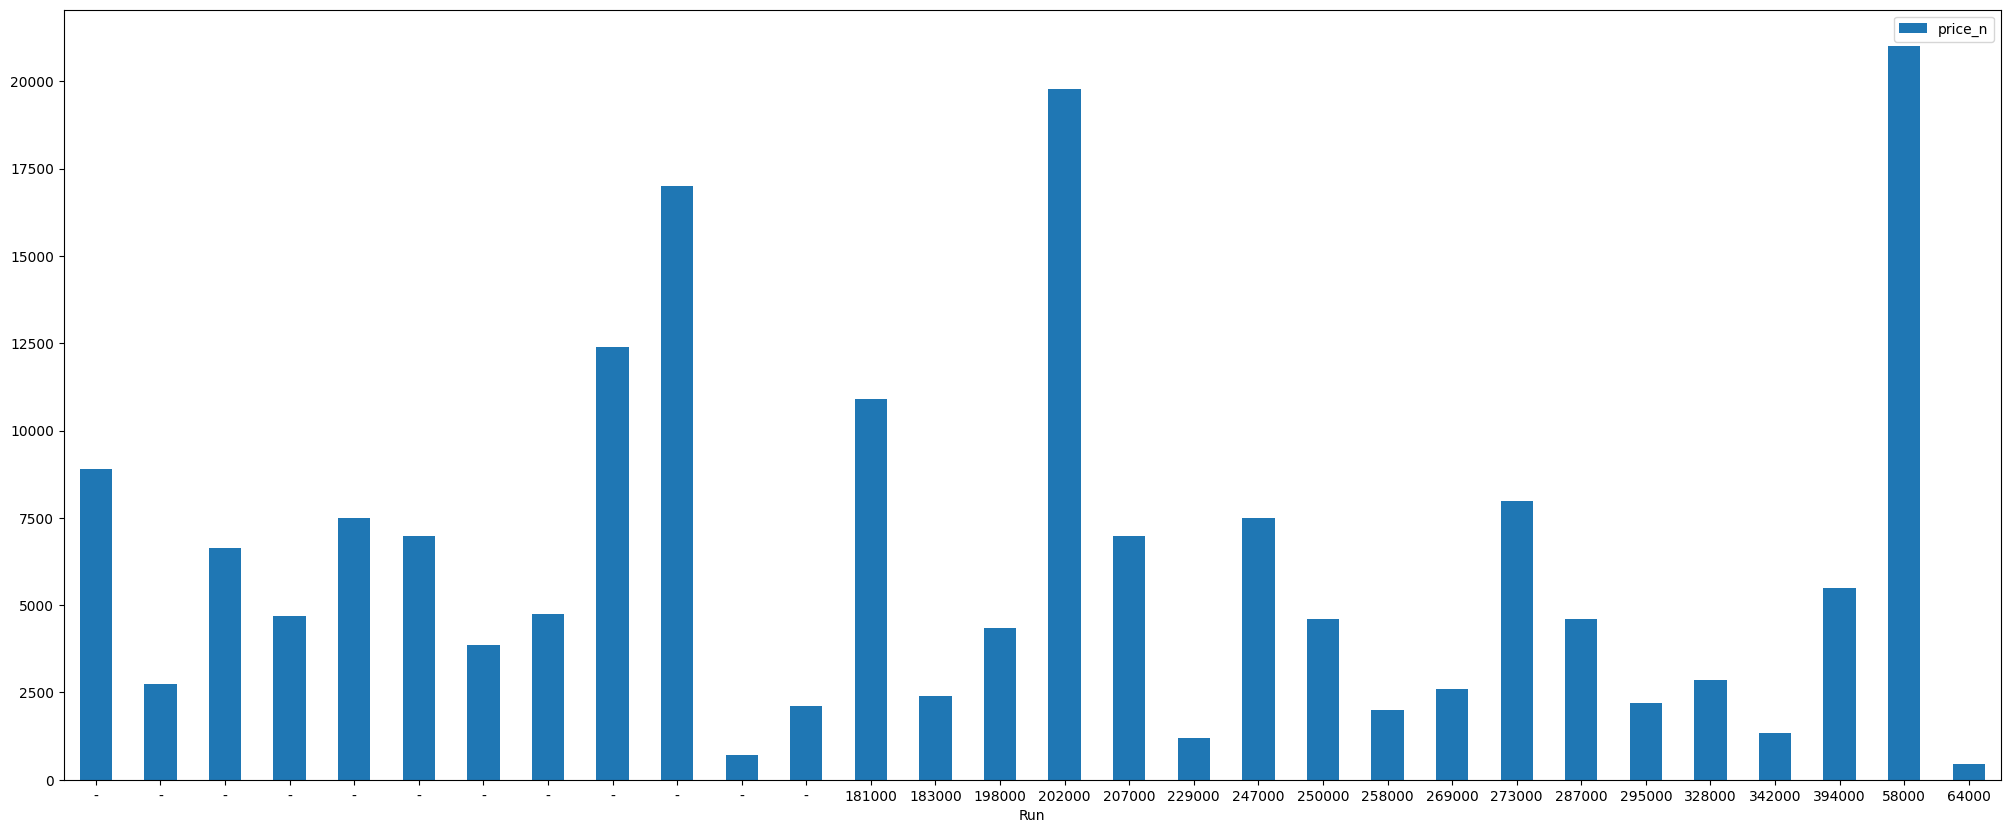

In [24]:
sorted_my_fords_run.plot.bar(x='Run', y="price_n", rot=0, figsize=(25, 10))

<AxesSubplot: xlabel='Run'>

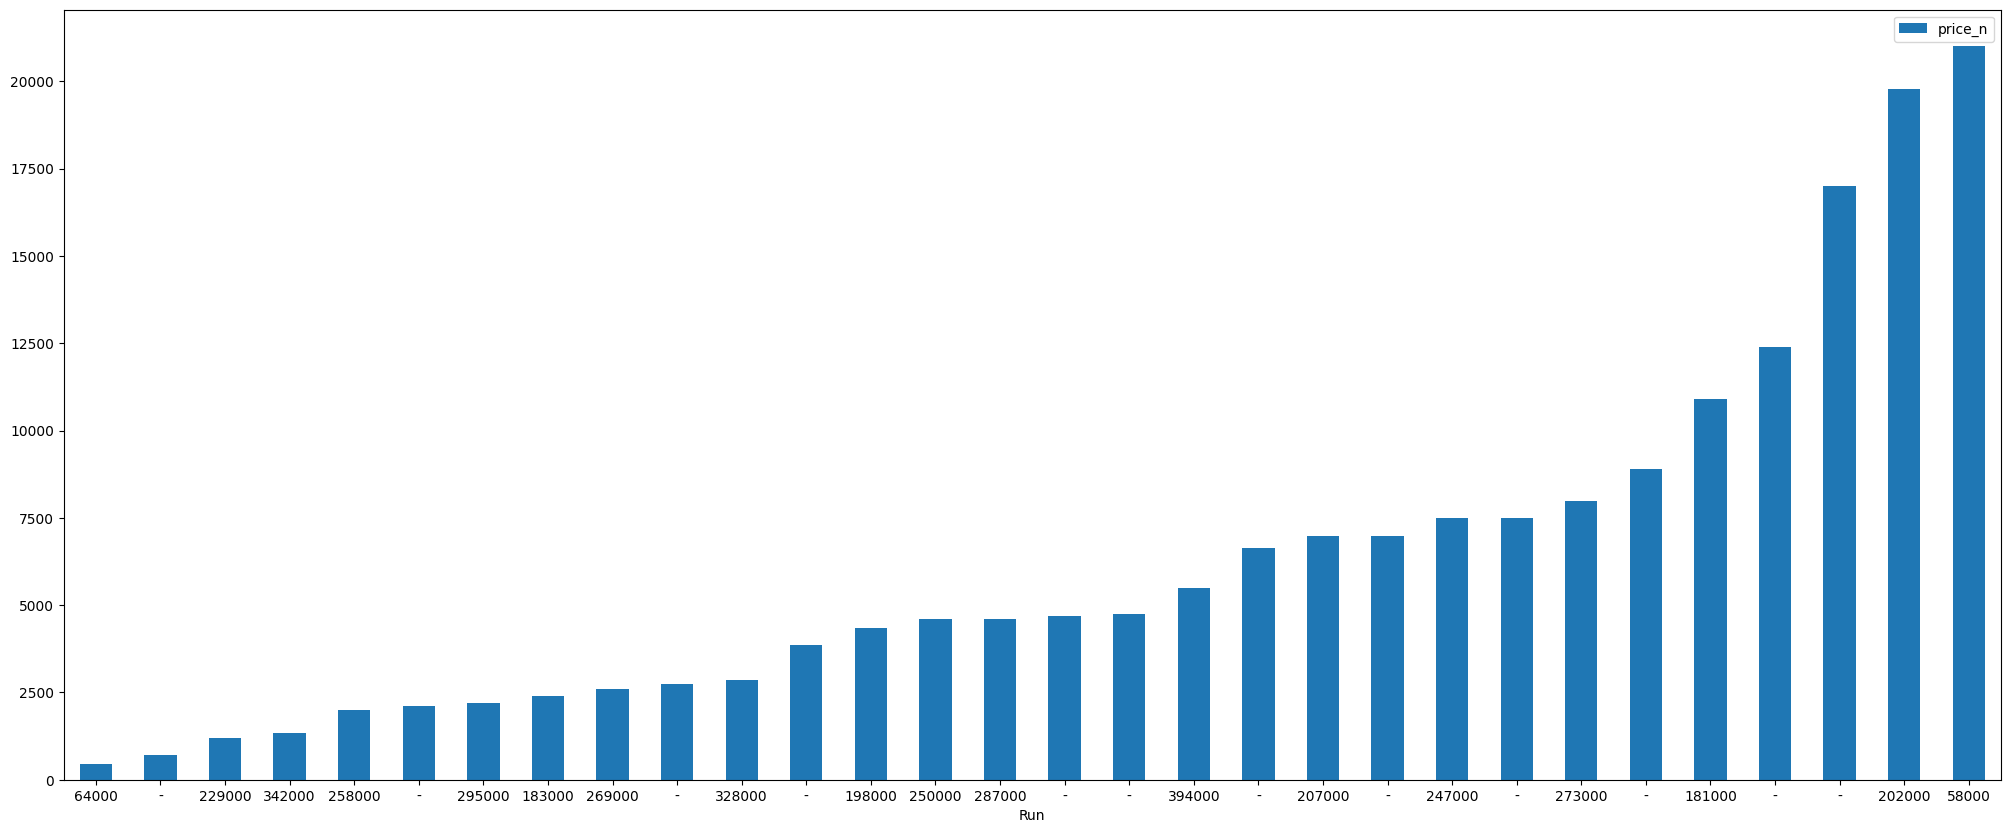

In [25]:
sorted_my_fords_price.plot.bar(x='Run', y="price_n", rot=0, figsize=(25, 10))

In [26]:
grouped_by_model = my_fords.groupby(by="Model")['price_n'].agg(["count", "min", "max", "mean", ])
grouped_by_model

,count,min,max,mean
Model,,,,
B-Max,1,6970,6970,6970.000000
C-Max,1,2850,2850,2850.000000
Escort,1,450,450,450.000000
Fiesta,1,6650,6650,6650.000000
Focus,6,700,7500,3848.333333
Galaxy,5,1990,7990,4286.000000
Kuga,4,7490,19790,14169.750000
Mondeo,4,1200,4700,3272.500000
S-Max,4,2390,8890,4470.000000


array([[<AxesSubplot: title={'center': 'count'}>,
        <AxesSubplot: title={'center': 'min'}>],
       [<AxesSubplot: title={'center': 'max'}>,
        <AxesSubplot: title={'center': 'mean'}>]], dtype=object)

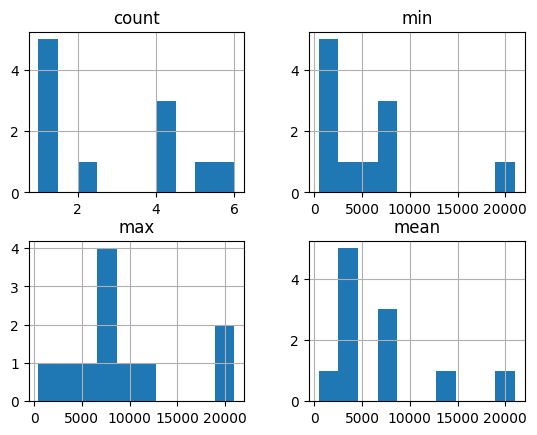

In [27]:
grouped_by_model.hist()

In [28]:
grouped_by_model['Model_c'] = grouped_by_model.index
grouped_by_model

,count,min,max,mean,Model_c
Model,,,,,
B-Max,1,6970,6970,6970.000000,B-Max
C-Max,1,2850,2850,2850.000000,C-Max
Escort,1,450,450,450.000000,Escort
Fiesta,1,6650,6650,6650.000000,Fiesta
Focus,6,700,7500,3848.333333,Focus
Galaxy,5,1990,7990,4286.000000,Galaxy
Kuga,4,7490,19790,14169.750000,Kuga
Mondeo,4,1200,4700,3272.500000,Mondeo
S-Max,4,2390,8890,4470.000000,S-Max


<AxesSubplot: xlabel='Model_c'>

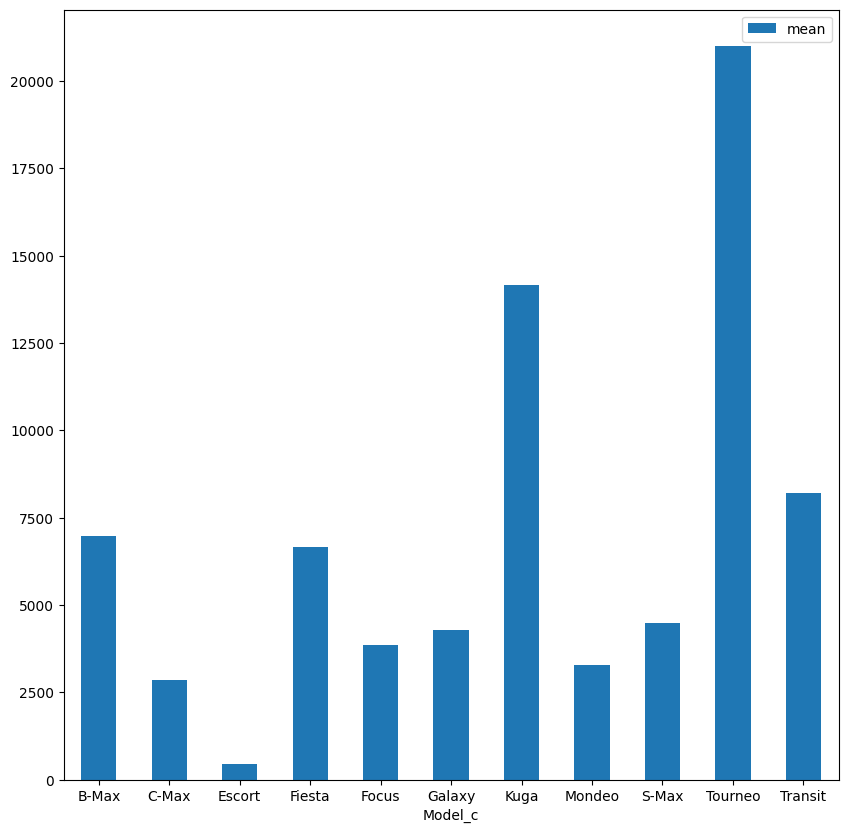

In [29]:
grouped_by_model.plot.bar(x='Model_c', y="mean", rot=0, figsize=(10, 10))

In [30]:
grouped_by_vol = my_fords.groupby(by="Volume")['price_n'].agg(["count", "min", "max", "mean", ]) # what is an opportunity to delete D and H in 'Volume'
grouped_by_vol

,count,min,max,mean
Volume,,,,
1.6,2,700,1350,1025.000000
1.6D,9,450,10900,5428.888889
1.8D,3,2390,3850,2996.666667
1.9D,2,1990,2100,2045.000000
2.0D,13,1200,21000,8999.923077
2.2D,1,5500,5500,5500.000000


array([[<AxesSubplot: title={'center': 'count'}>,
        <AxesSubplot: title={'center': 'min'}>],
       [<AxesSubplot: title={'center': 'max'}>,
        <AxesSubplot: title={'center': 'mean'}>]], dtype=object)

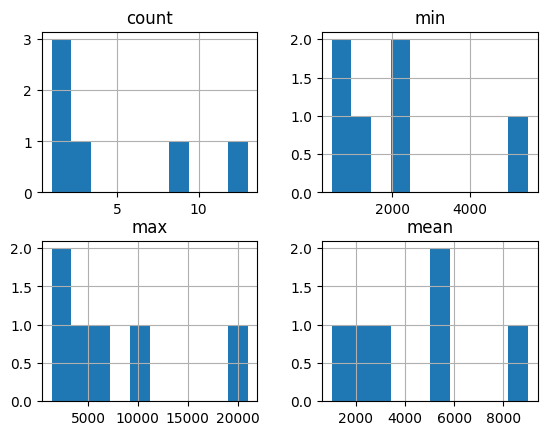

In [31]:
grouped_by_vol.hist()

In [32]:
import numpy as np

In [33]:
my_fords_pivoted =pd.pivot_table(data=my_fords, index=["Model"], columns=["Volume"], values=["price_n"], aggfunc=np.mean)
my_fords_pivoted

price_n                                                
Volume      1.6     1.6D         1.8D    1.9D      2.0D    2.2D
Model                                                          
B-Max       NaN   6970.0          NaN     NaN       NaN     NaN
C-Max       NaN   2850.0          NaN     NaN       NaN     NaN
Escort      NaN    450.0          NaN     NaN       NaN     NaN
Fiesta      NaN   6650.0          NaN     NaN       NaN     NaN
Focus    1025.0   5260.0          NaN     NaN       NaN     NaN
Galaxy      NaN      NaN          NaN  2045.0   5780.00     NaN
Kuga        NaN      NaN          NaN     NaN  14169.75     NaN
Mondeo      NaN      NaN          NaN     NaN   3272.50     NaN
S-Max       NaN      NaN  2996.666667     NaN   8890.00     NaN
Tourneo     NaN      NaN          NaN     NaN  21000.00     NaN
Transit     NaN  10900.0          NaN     NaN       NaN  5500.0

In [34]:
import seaborn as sns

Text(0.5, 1.0, 'Price by volume and model')

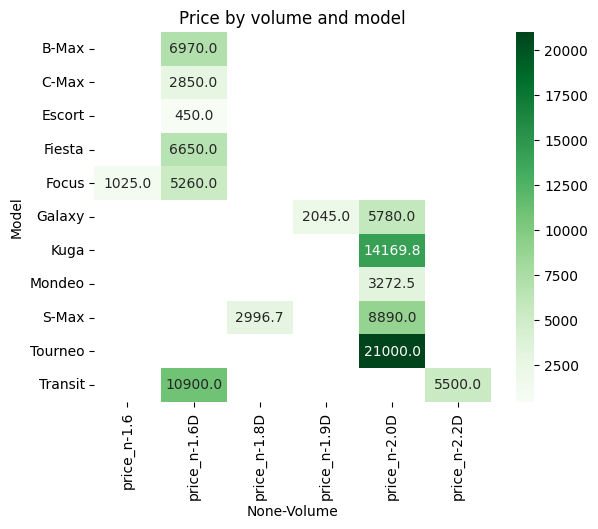

In [35]:
ax = sns.heatmap(data=my_fords_pivoted, cmap='Greens', annot=True, fmt='.1f')
ax.set_title('Price by volume and model')

In [36]:
my_fords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  30 non-null     object
 1   Model        30 non-null     object
 2   Year         30 non-null     object
 3   Volume       30 non-null     object
 4   Run          30 non-null     object
 5   Price        30 non-null     object
 6   price_n      30 non-null     int32 
dtypes: int32(1), object(6)
memory usage: 1.6+ KB


In [37]:
my_fords.to_csv("my_fords.csv", encoding="UTF-8")